# House Price Predection: Advanced Regression
## Data Understanding:

In [109]:
# Importing necessary Python libraries for data input and understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the data
raw_data = pd.read_csv('train.csv')
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
raw_data.shape

(1460, 81)

In [111]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [112]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### The object of the model is to predict the price of houses with the available independent variables. Management will use this to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

## Step 1: Data Cleaning and Manipulation: 

In [113]:
# Checking the dataset for the amount of null values in percentage
round(raw_data.isnull().sum()/len(raw_data.index)*100,2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

##### As per the given dataset NA refers to some values, means NA doesn't means null. Like for PoolQC 'NA' refers to 'No Pool'
##### Converting the NA with some meaningful values as per given dataset.

In [114]:
for col in ('PoolQC','GarageType','Alley','Fence','FireplaceQu','GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtQual','BsmtCond'):    
    raw_data[col] = raw_data[col].fillna('Not Available')

In [115]:
# Removing the variable 'MiscFeature' and 'Id' as it is for Indexing only
raw_data.drop(['MiscFeature','Id'],axis=1,inplace=True)

In [116]:
# Outliers removal process
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    result= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return result

In [117]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,...,0,0,Not Available,Not Available,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,0,12,2008,WD,Normal,250000


##### As per the provided data dictionary, the nulls in these columns indicates the absence of facility which may affect the price

## Step 2: Data Visualization:
## Performing EDA

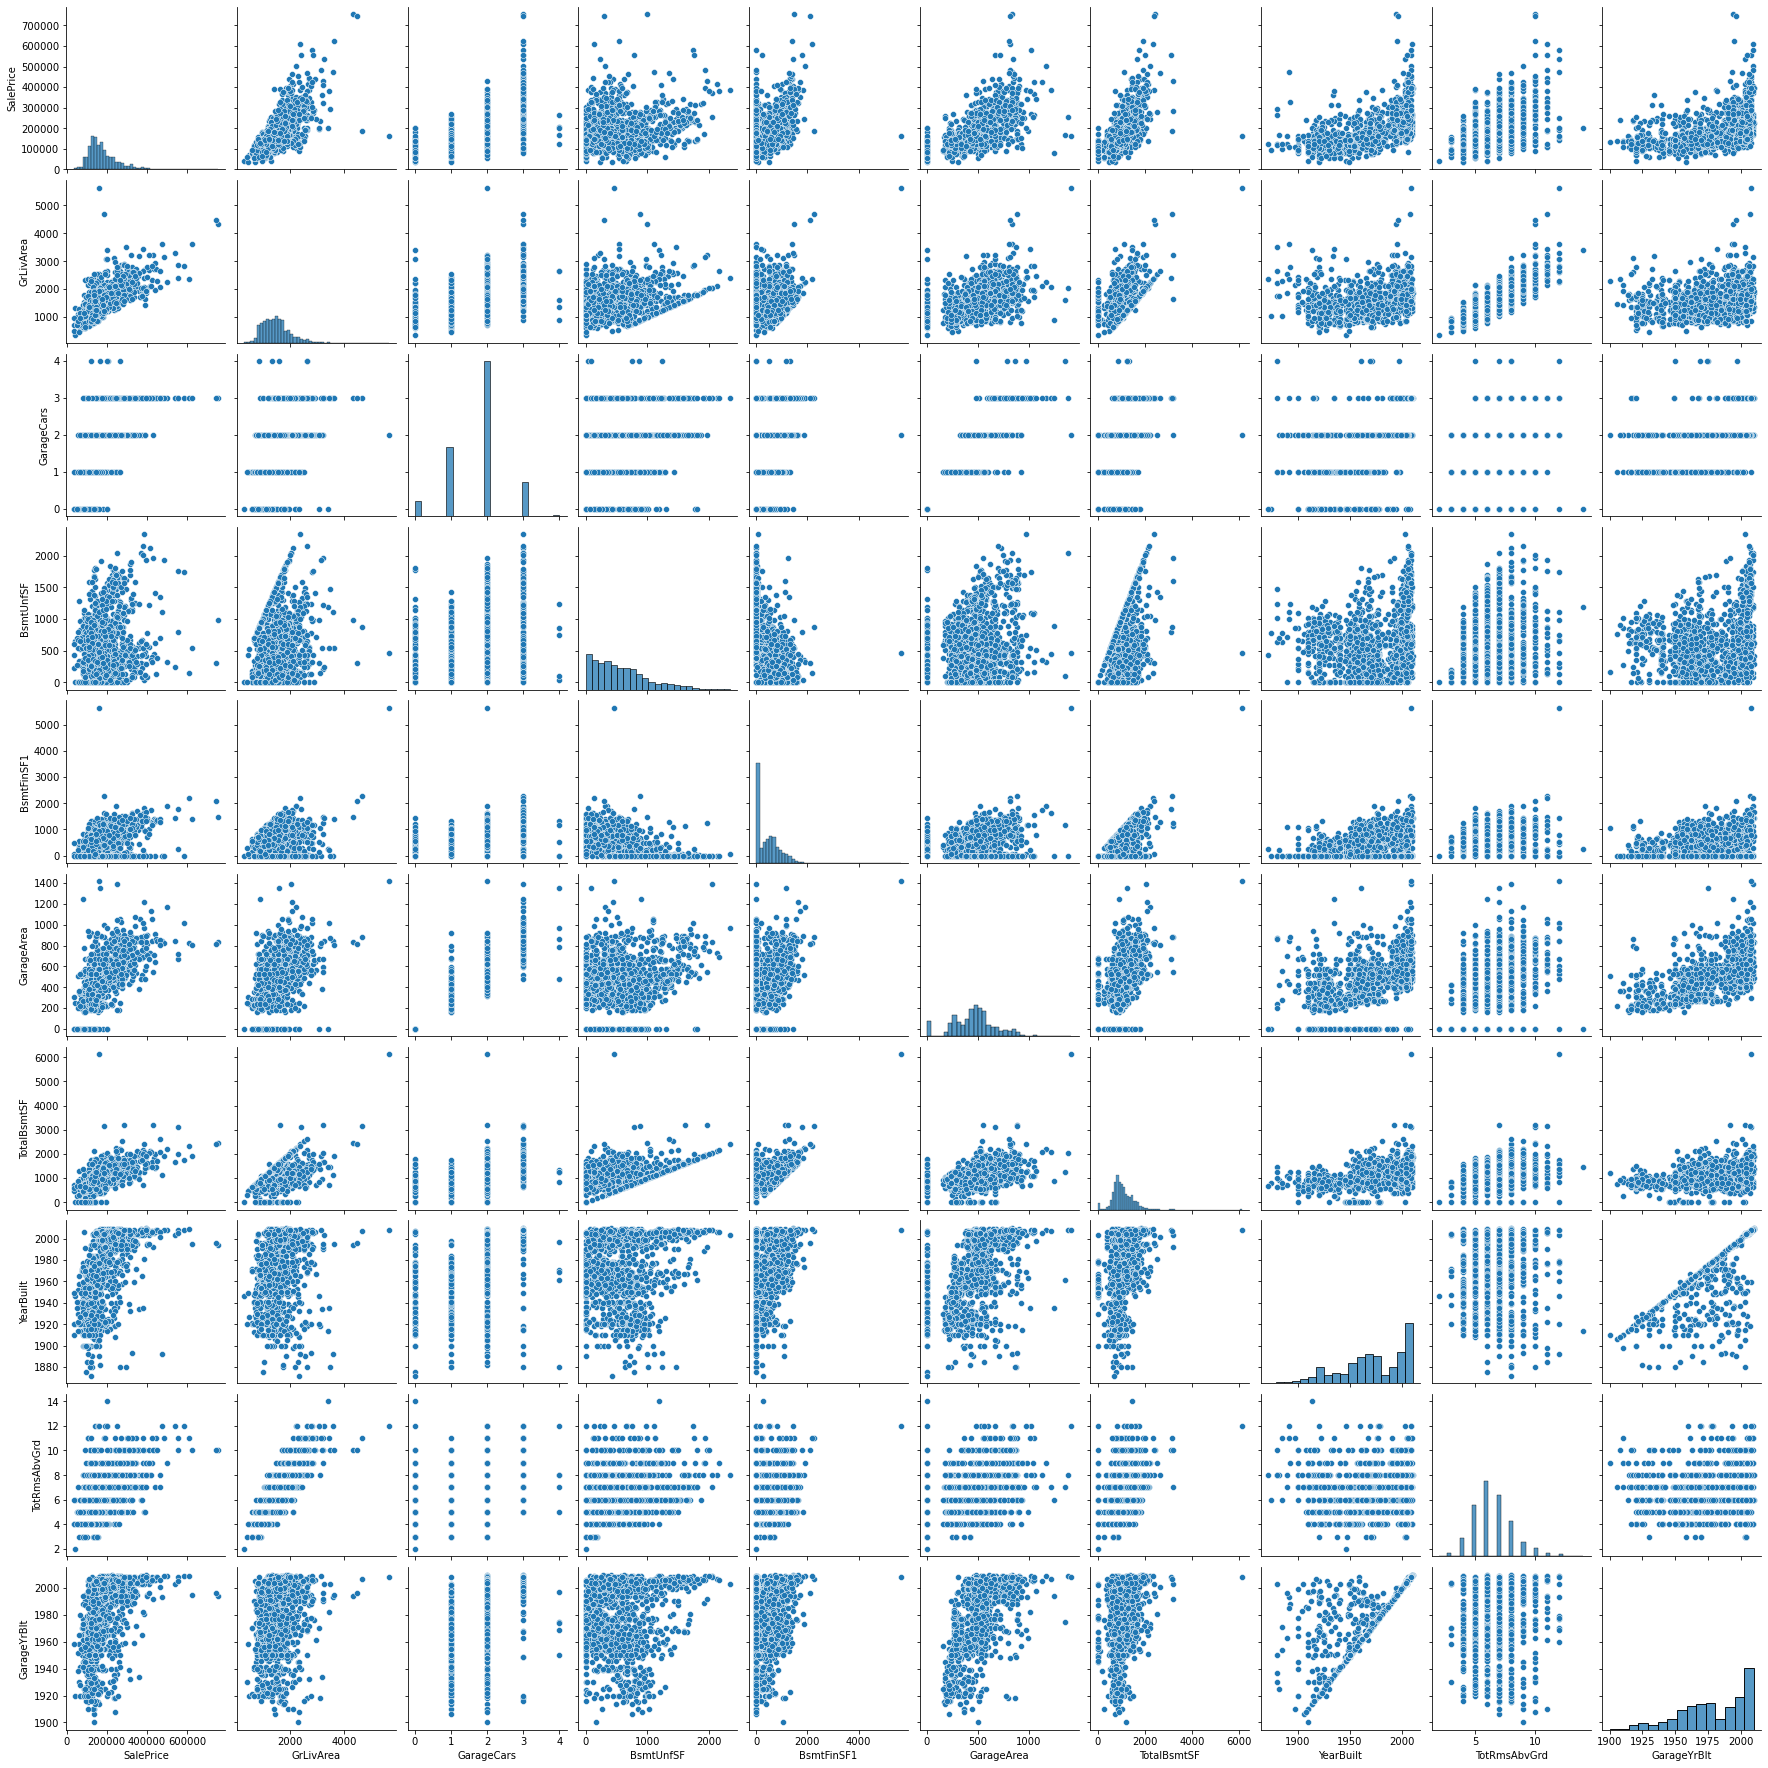

In [75]:
# Pairplot for Numeric Variables
sns.pairplot(raw_data, vars=['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt'],size=2.5)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

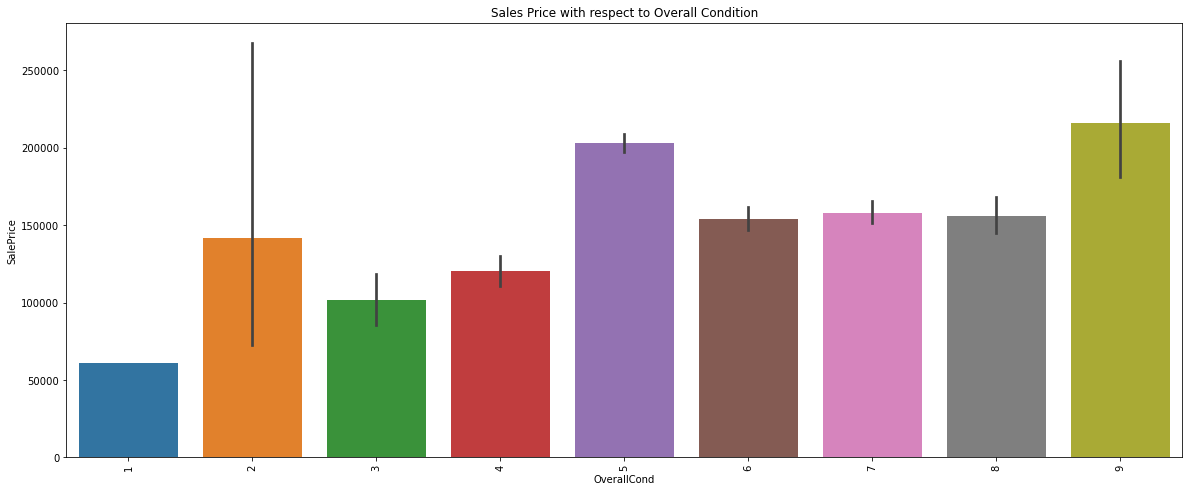

In [76]:
# Ploting 'OverallCond' with respect to the 'SalePrice':
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= raw_data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

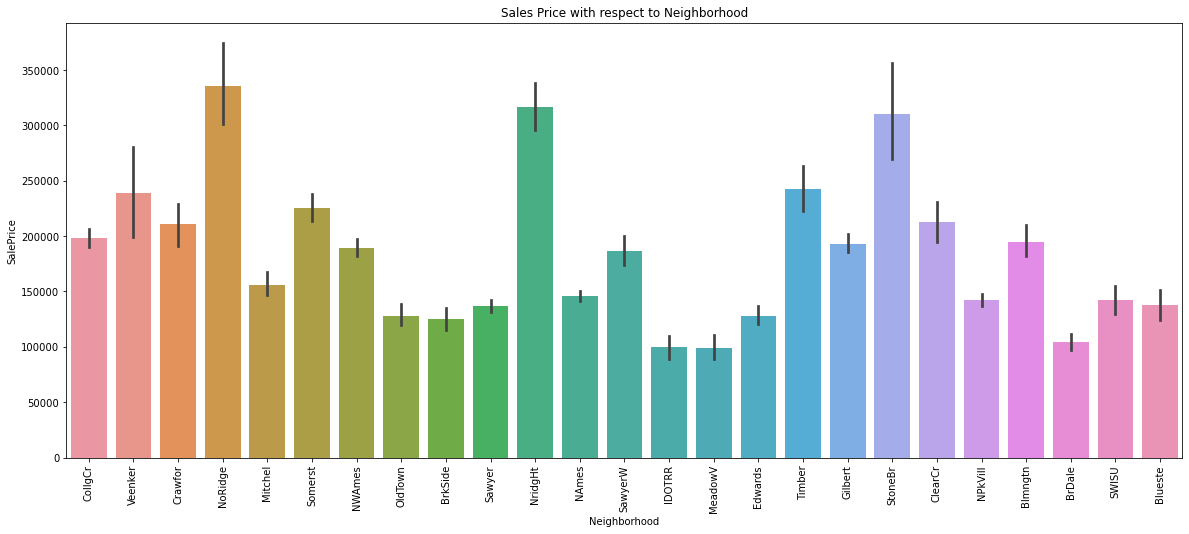

In [77]:
# Ploting 'Neighborhood' with respect to the 'SalePrice':
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= raw_data)
plt.title("Sales Price with respect to Neighborhood")
plt.xticks(rotation=90)

##### Properties in some of the Neighborhoods are high priced. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

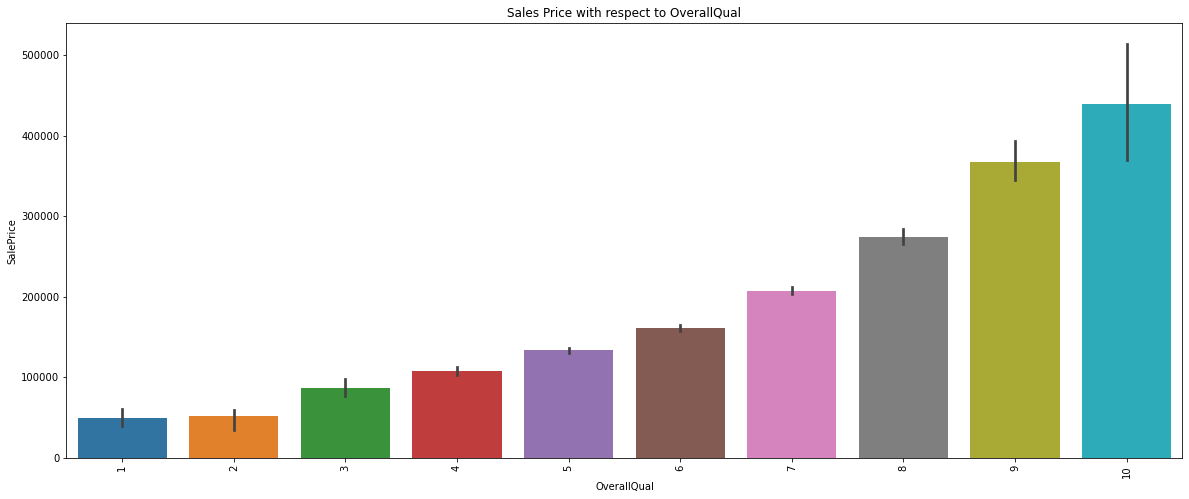

In [78]:
# Ploting 'OverallQual' with respect to the 'SalePrice':
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= raw_data)
plt.title("Sales Price with respect to OverallQual")
plt.xticks(rotation=90)

##### Seems increase in the overall quality has a direct positive effect on the sale price
#### Most of these variables seems have diverse relationship with the 'Sale Price',try to define some of them below:

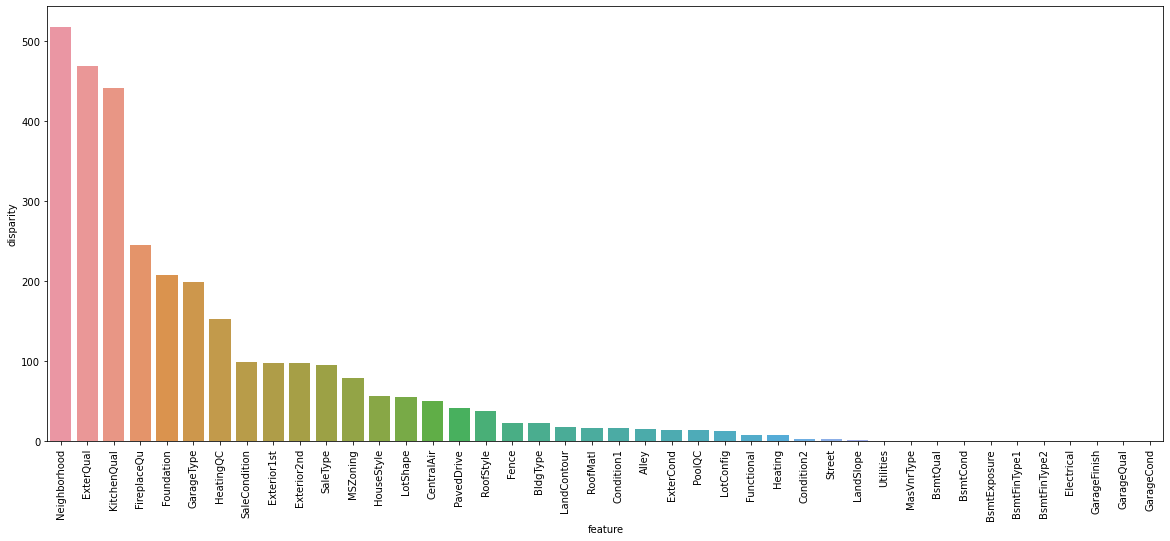

In [79]:
import scipy.stats as stats

plt.figure(figsize=(20, 8))

qualitative = [f for f in raw_data.columns if raw_data.dtypes[f] == 'object']

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(raw_data)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

#### Above chart shows that some of the majorly influencing variables are:
- Neighbourhood
- ExterQuality
- KitchenQuality
- FirePlace Quality

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

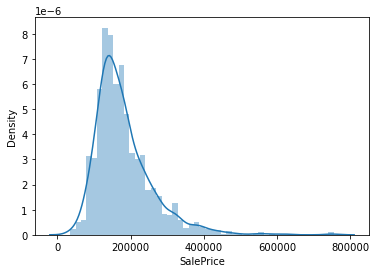

In [80]:
sns.distplot(raw_data['SalePrice'])

#### Since the Saleprice figures are skewed towards left, Applying the log transformation to obtain a centralized data:

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

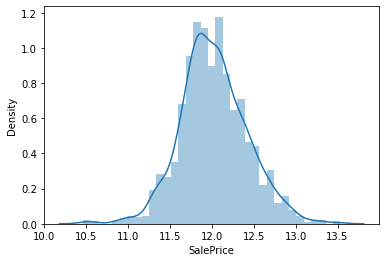

In [81]:
# Log Transformation
raw_data['SalePrice']=np.log1p(raw_data['SalePrice'])
sns.distplot(raw_data['SalePrice'])

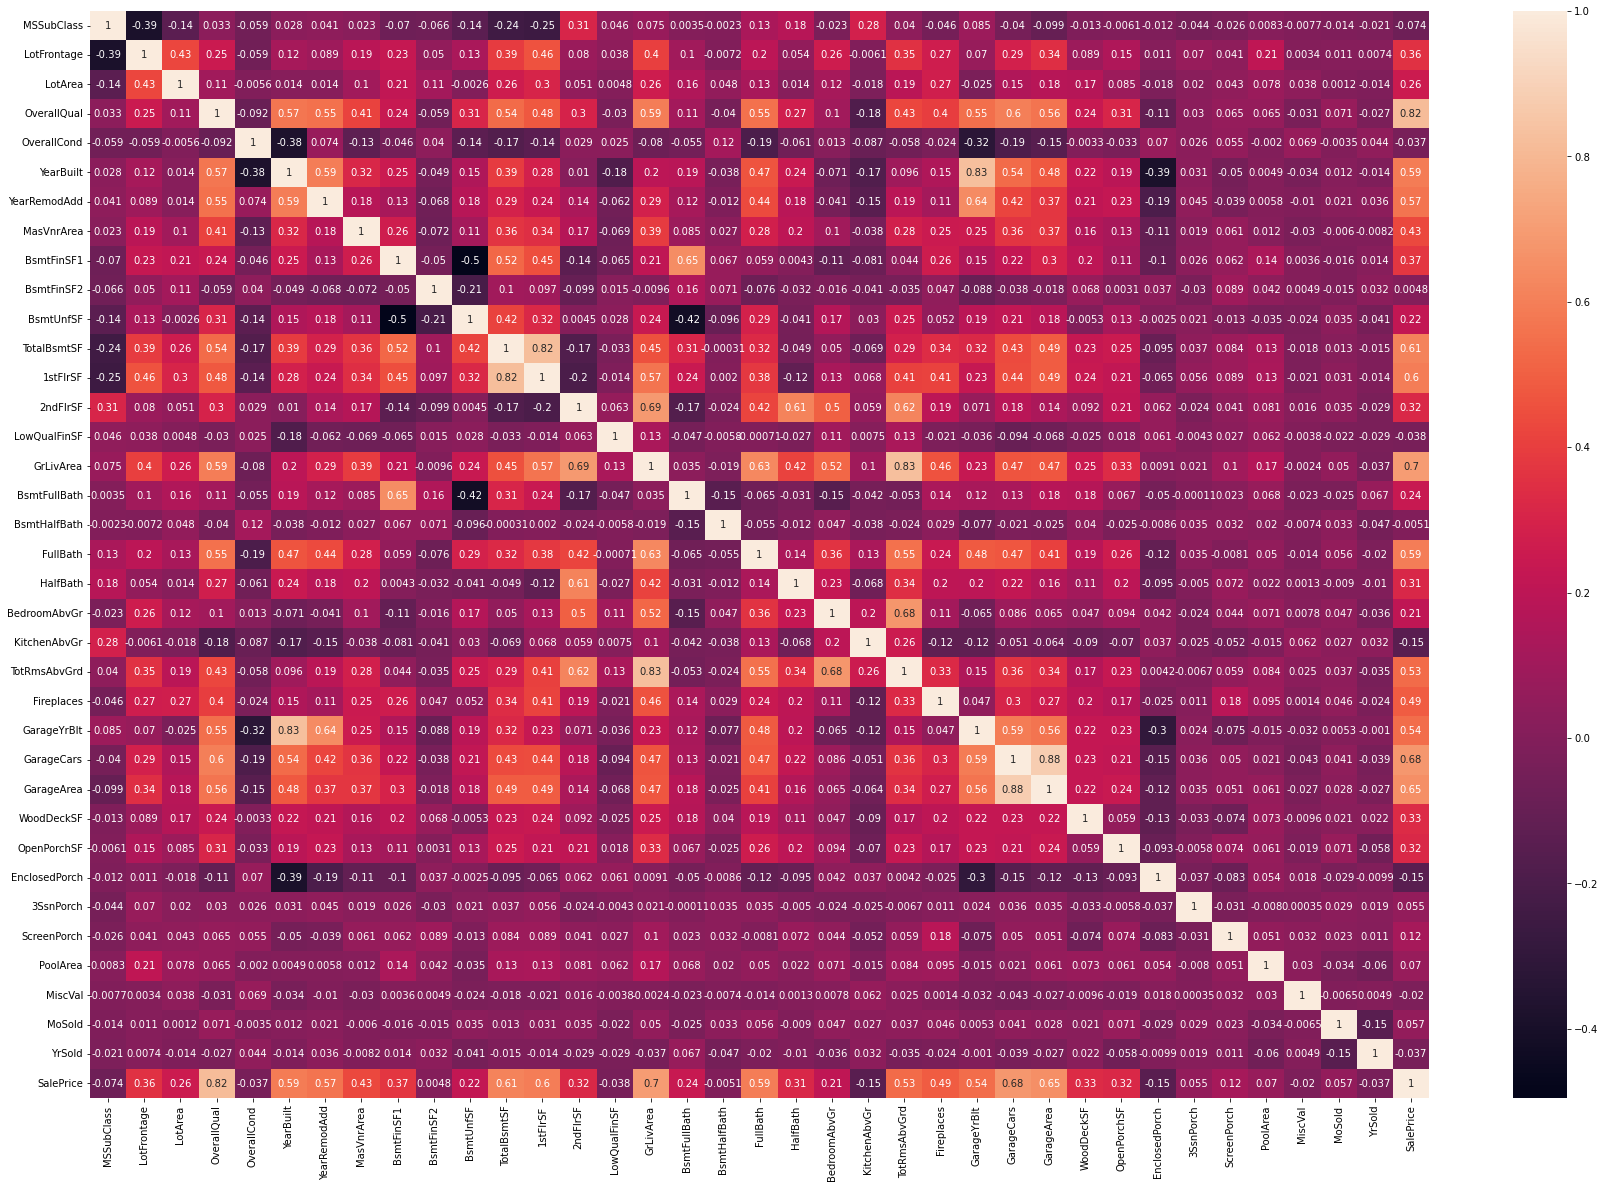

In [82]:
# Checking the correlation between variables
plt.figure(figsize= (30,20))
sns.heatmap(raw_data.corr(), annot=True)
plt.show()

# Step 3: Data Preparation:

In [118]:
# Numeric columns
raw_data.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [119]:
raw_data.shape

(1460, 79)

In [120]:
Q1 = raw_data[cols].quantile(0.05)
Q3 = raw_data[cols].quantile(0.95)
IQR = Q3 - Q1

raw_data = raw_data[~((raw_data[cols] < (Q1 - 1.5 * IQR)) |(raw_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [121]:
raw_data.shape

(1266, 79)

In [122]:
# Checking the dataset for the amount of null values in percentage
round(raw_data.isnull().sum()/len(raw_data.index)*100,2).sort_values(ascending=False).head(20)

LotFrontage     17.61
GarageYrBlt      4.34
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.08
KitchenQual      0.00
GarageType       0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
TotRmsAbvGrd     0.00
MSSubClass       0.00
KitchenAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
dtype: float64

In [123]:
# For the 'LotFrontage' and 'GarageYrBlt' imputing the missing values with the median since the feature contains outliers
raw_data['LotFrontage'] = raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median())
raw_data['GarageYrBlt'] = raw_data['GarageYrBlt'].fillna(raw_data['GarageYrBlt'].median())

In [124]:
round(raw_data.isnull().sum()/len(raw_data.index)*100,2).sort_values(ascending=False).head(10)

MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.08
MSSubClass      0.00
GarageType      0.00
FireplaceQu     0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd    0.00
KitchenQual     0.00
dtype: float64

In [125]:
# For the below columns imputing the null values with 'mode'
for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):    
    raw_data[col] = raw_data[col].fillna(raw_data[col].mode()[0])

In [126]:
raw_data.isnull().values.any()

False

In [127]:
# Copying/Storing the data into new Data-Frame
housing = raw_data.copy()
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,...,0,0,Not Available,Not Available,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,0,12,2008,WD,Normal,250000


### Creating dummy variables for all the categorical variables:

In [128]:
# Subset all categorical variables
house_categorical=housing.select_dtypes(include=['object'])

# Convert into dummies
house_dummies= pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not Available,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [129]:
# Dropping the Categorical variables as they are already dummy encoded
final_data = housing.drop(list(house_categorical.columns), axis=1)
final_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [130]:
# Merge the results from above to orignal data-frame
final_data = pd.concat([final_data, house_dummies], axis=1)
final_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [131]:
final_data.shape

(1266, 243)

### Dividing the data into Train and Test sets:

In [132]:
y = final_data.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [133]:
X = final_data
X.shape

(1266, 242)

In [134]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [135]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (886, 242)
X_test shape (380, 242)
y_train shape (886,)
y_test shape (380,)


##### Performing Scaling:
###### It is important to have all variables in same scale.
###### Can use Standardization and Normalization so that all the units of the coefficients are on same scale.

###### 2 common ways of scaling are:
    1) Min-Max Scaling (Normalization): Between 0 and 1
    2) Standardization: mean-0, sigma-1

In [136]:
# Columns which need to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [137]:
num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
686,60,84.0,10207,7,6,2007,2007,0.0,0,0,...,578,144,105,0,0,0,0,0,8,2007
933,20,63.0,8487,7,5,2004,2004,210.0,20,0,...,570,192,36,0,0,0,0,0,8,2009
1217,20,72.0,8640,8,5,2009,2009,72.0,936,0,...,552,135,112,0,0,0,0,0,9,2009
485,20,80.0,9600,5,7,1950,2007,0.0,607,0,...,264,0,80,120,0,0,0,0,7,2009
1303,20,73.0,8688,7,5,2005,2005,228.0,0,0,...,834,208,59,0,0,0,0,0,4,2006


In [138]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.0,886.000000,886.0,886.000000,886.000000,886.000000,886.000000
mean,54.864560,68.932280,9655.531603,6.177201,5.558691,1973.738149,1985.878104,110.413093,446.343115,39.553047,...,0.002257,0.003386,0.095937,0.0,0.855530,0.0,0.002257,0.012415,0.818284,0.099323
std,41.184904,20.711795,4205.441710,1.362608,1.065350,28.952313,20.409282,182.387502,431.721860,136.806577,...,0.047485,0.058124,0.294671,0.0,0.351764,0.0,0.047485,0.110793,0.385828,0.299264
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7318.500000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9315.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,399.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,60.000000,79.000000,11542.750000,7.000000,6.000000,2002.000000,2004.000000,175.500000,732.750000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,1129.000000,2188.000000,972.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [139]:
# Using MinMaxScaler for rescalings the feature
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

In [140]:
# Apply Scaler on all the Numeric variables
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [141]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
686,0.235294,0.391304,0.253040,0.666667,0.571429,0.976923,0.950000,0.000000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
933,0.000000,0.260870,0.204176,0.666667,0.428571,0.953846,0.900000,0.186005,0.009141,0.0,...,0,0,0,0,1,0,0,0,1,0
1217,0.000000,0.316770,0.208523,0.777778,0.428571,0.992308,0.983333,0.063773,0.427788,0.0,...,0,0,1,0,0,0,0,0,0,1
485,0.000000,0.366460,0.235795,0.444444,0.714286,0.538462,0.950000,0.000000,0.277422,0.0,...,0,0,0,0,1,0,0,0,1,0
1303,0.000000,0.322981,0.209886,0.666667,0.428571,0.961538,0.916667,0.201949,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


In [142]:
X_train.describe

<bound method NDFrame.describe of       MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
686     0.235294     0.391304  0.253040     0.666667     0.571429   0.976923   
933     0.000000     0.260870  0.204176     0.666667     0.428571   0.953846   
1217    0.000000     0.316770  0.208523     0.777778     0.428571   0.992308   
485     0.000000     0.366460  0.235795     0.444444     0.714286   0.538462   
1303    0.000000     0.322981  0.209886     0.666667     0.428571   0.961538   
...          ...          ...       ...          ...          ...        ...   
937     0.235294     0.335404  0.237926     0.666667     0.428571   0.961538   
64      0.235294     0.298137  0.229403     0.666667     0.428571   0.900000   
408     0.235294     0.546584  0.365170     0.666667     0.428571   0.969231   
96      0.000000     0.354037  0.254659     0.666667     0.428571   0.915385   
926     0.235294     0.447205  0.303949     0.777778     0.428571   0.946154   

     

In [143]:
X_train.shape

(886, 242)

## Step 4: Data Modeling and Evaluation:

#### Creating Linear Regression Model:
##### RFE (Recursive Feature Elimination) for automated feature selection:

In [144]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [145]:
# Running RFE with output number of 30 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [146]:
rfe = RFE(lm, step=30)
rfe = rfe.fit(X_train, y_train)

In [147]:
# List the selected 100 variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 2),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 3),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 2),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 3),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 2),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 3),
 ('YrSold', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 (

In [148]:
# Variables where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Not Available', 'GarageCond_Po', 'GarageCond_TA',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_New'],
      dtype='object', length=121)

In [149]:
# Variables where RFE support is False
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=121)

In [150]:
# Creating X_test dataframe where with RFE selected variables
X_train_rfe = X_train[col]

In [151]:
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Not Available,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_New
686,0.235294,0.253040,0.666667,0.571429,0.976923,0.000000,0.000000,0.0,0.374144,0.272614,...,0,1,0,0,0,0,1,0,0,1
933,0.000000,0.204176,0.666667,0.428571,0.953846,0.186005,0.009141,0.0,0.633562,0.467873,...,0,1,0,0,0,0,1,0,0,0
1217,0.000000,0.208523,0.777778,0.428571,0.992308,0.063773,0.427788,0.0,0.155822,0.405490,...,0,1,0,0,0,0,1,0,0,1
485,0.000000,0.235795,0.444444,0.714286,0.538462,0.000000,0.277422,0.0,0.216610,0.347162,...,0,1,0,0,0,0,1,0,0,0
1303,0.000000,0.209886,0.666667,0.428571,0.961538,0.201949,0.000000,0.0,0.691781,0.504055,...,0,1,0,0,0,0,1,0,0,0


In [152]:
# Import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

In [153]:
# Predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9507461533949357

In [154]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-4.6043779289295225e+19

### Ridge and Lasso Regression:

In [155]:
# Importing libraries for modeling
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Lasso regression model:

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}

lasso=Lasso()
folds = 5

# Cross validation
lasso_model_cv = GridSearchCV(estimator=lasso,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              cv=folds,
                              return_train_score=True,
                              verbose=1)

lasso_model_cv.fit(X_train, y_train)

In [157]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.255042,0.036741,0.006209,0.003232,0.0001,{'alpha': 0.0001},-16895.927064,-17316.735047,-17043.726661,-16052.401404,...,-16913.297662,456.032727,19,-11071.824064,-11364.937162,-11563.681358,-11651.398302,-10910.193094,-11312.406796,283.008657
1,0.241849,0.030434,0.004337,0.005812,0.001,{'alpha': 0.001},-16888.652965,-17318.346291,-17043.534750,-16052.311751,...,-16912.155734,456.442139,18,-11071.848172,-11364.958190,-11563.687566,-11651.395682,-10910.193649,-11312.416652,283.005656
2,0.239933,0.014076,0.009578,0.005382,0.01,{'alpha': 0.01},-16815.754454,-17338.048981,-17041.544983,-16051.406874,...,-16901.408615,462.369304,15,-11072.151399,-11365.184082,-11563.934878,-11651.426495,-10910.355213,-11312.610413,282.967877
3,0.269890,0.016837,0.004553,0.005739,0.05,{'alpha': 0.05},-16735.367642,-17434.326675,-17032.636371,-16047.161437,...,-16904.008977,488.827949,16,-11073.633698,-11366.277824,-11565.267172,-11651.976581,-10911.437120,-11313.718479,282.817527
4,0.267887,0.010225,0.009013,0.007485,0.1,{'alpha': 0.1},-16727.784249,-17555.298307,-17021.598258,-16042.635422,...,-16926.116134,520.079928,21,-11075.497874,-11367.698965,-11566.870737,-11652.536412,-10912.926494,-11315.106096,282.549533


In [158]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 20}
-15649.183551561098


In [159]:
alpha =20
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train)

Lasso(alpha=20)

In [160]:
lasso.coef_

array([-1.50330304e+04,  1.03648174e+04,  2.43053068e+04,  4.40159272e+04,
        3.74994341e+04,  3.89154884e+04,  9.79032538e+03,  1.44649313e+04,
        2.96847939e+04,  0.00000000e+00,  0.00000000e+00,  7.01867192e+04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.66673836e+05,
        0.00000000e+00,  0.00000000e+00,  9.00511478e+03,  7.13656526e+03,
       -1.67389674e+04,  0.00000000e+00,  1.77071237e+04,  6.01718776e+03,
       -9.62860492e+03,  1.63916430e+04,  2.85370903e+04,  3.71999811e+03,
        8.45670561e+03,  1.01517251e+04,  0.00000000e+00,  1.74075620e+04,
        0.00000000e+00,  0.00000000e+00, -2.90707554e+02,  0.00000000e+00,
        0.00000000e+00,  2.56186486e+03,  1.09703837e+03, -3.70938467e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.32583681e+03,
       -0.00000000e+00,  1.24370037e+03,  6.55791032e+03, -5.36145387e+03,
        3.04677127e+03, -1.70899612e+04,  4.98643595e+03, -8.51461680e+03,
       -0.00000000e+00, -

In [181]:
# Calculating R2 score from Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score:', r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('         ', r2_test_lr)
metric1.append(r2_test_lr)

R2 Score: 0.947862343791583
          0.9024461426147911


### Ridge regression model:

In [182]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}

ridge=Ridge()
folds = 5

# Cross validation
ridge_model_cv = GridSearchCV(estimator=ridge,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              cv=folds,
                              return_train_score=True,
                              verbose=1)

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [183]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020766,0.021225,0.007942,0.007192,0.0001,{'alpha': 0.0001},-16773.493332,-17691.194343,-17081.923732,-16117.744909,...,-16962.630961,515.615981,23,-11065.381625,-11355.399824,-11558.709902,-11640.632932,-10905.954859,-11305.215828,281.500294
1,0.013777,0.004112,0.007817,0.004142,0.001,{'alpha': 0.001},-16773.742152,-17677.668823,-17074.341681,-16110.223740,...,-16956.835556,513.868452,22,-11067.185963,-11356.818286,-11560.061186,-11641.767042,-10907.316846,-11306.629865,281.370755
2,0.009434,0.006545,0.009500,0.005850,0.01,{'alpha': 0.01},-16764.131066,-17568.559688,-17004.168012,-16047.190208,...,-16904.616122,502.115031,21,-11083.084503,-11367.135836,-11574.088858,-11651.719594,-10920.383666,-11319.282491,280.228627
3,0.015838,0.006391,0.009348,0.003333,0.05,{'alpha': 0.05},-16636.040238,-17265.063172,-16765.775143,-15930.701830,...,-16740.431505,463.690072,20,-11137.724428,-11399.483330,-11621.863185,-11684.860023,-10976.347730,-11364.055739,272.829084
4,0.020517,0.006687,0.002382,0.002918,0.1,{'alpha': 0.1},-16450.392530,-17045.976271,-16551.364480,-15831.810918,...,-16588.588779,453.397245,19,-11186.864186,-11431.059754,-11662.176337,-11713.384365,-11027.978598,-11404.292648,265.196367


In [184]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 3.0}
-15395.074156881374


In [185]:
alpha =3
ridge = Ridge(alpha=alpha)        
ridge.fit(X_train, y_train)

Ridge(alpha=3)

In [186]:
ridge.coef_

array([-12518.31002116,  11476.94840546,  19123.42013989,  40383.83665944,
        26479.27538107,  17885.98868475,  13545.6070558 ,  18434.9821117 ,
        41582.99942974,   4657.14662306,  19478.00739373,  43983.46055572,
        51921.6276549 ,  28615.07608206,      0.        ,  63077.44233905,
         2698.39118469,    686.39232383,  17225.95165137,  11468.75692237,
        -7410.88167691,      0.        ,  28657.04644704,  11601.92467547,
        -7324.87162821,  18938.17308272,  28590.59292306,   6278.24883479,
        10047.12884075,   9818.47991855,      0.        ,  13544.11956122,
            0.        ,      0.        ,    206.85704423,    183.72173979,
         3412.63189345,   3762.76561053,   4571.48290955,  -2192.72612422,
        -2508.31955375,    239.78223499,   -669.84287693,   6484.05808515,
          295.70519441,    986.7036865 ,   6580.77925692,  -4443.96011052,
         2915.57983543,  -8465.57476658,   5981.46765202, -10478.75504591,
        -1690.21738181,  

In [188]:
# Calculating R2 score from Ridge

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score:', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('         ', r2_test_lr)
metric2.append(r2_test_lr)

R2 Score: 0.9448091485839297
          0.9031409398691665


In [190]:
print('R2 score coming via Lasso', metric1)
print('R2 score coming via Ridge', metric2)

R2 score coming via Lasso [0.947862343791583, 0.9024461426147911]
R2 score coming via Ridge [0.9448091485839297, 0.9031409398691665]


#### The R2 values for Train and Test matches well, indicating an optimum model

# Step 4: Data Modeling and Evaluation: 

In [194]:
ridge_pred = ridge.predict(X_test)

#### Plotting y_test and y_pred to understand the spread for Ridge and Lasso regression:

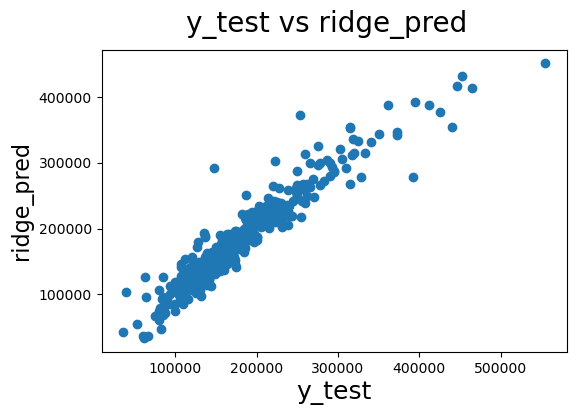

In [195]:
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

In [196]:
lasso_pred = lasso.predict(X_test)

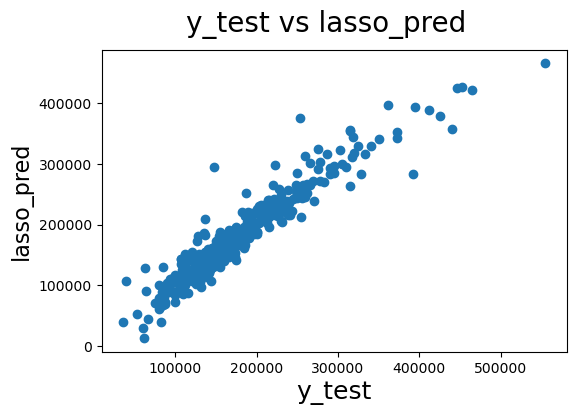

In [197]:
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)           # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

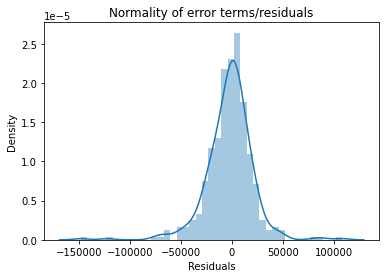

In [198]:
y_response=y_test-lasso_pred

# Distribution of errors
sns.distplot(y_response,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Checking the effects of chnage in coefficients after regularization:

In [199]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(50)

,Ridge,Lasso
MSSubClass,-12518.310021,-15033.030445
LotFrontage,11476.948405,10364.817394
LotArea,19123.420140,24305.306778
OverallQual,40383.836659,44015.927154
OverallCond,26479.275381,37499.434080
YearBuilt,17885.988685,38915.488440
YearRemodAdd,13545.607056,9790.325382
MasVnrArea,18434.982112,14464.931336
BsmtFinSF1,41582.999430,29684.793934
BsmtFinSF2,4657.146623,0.000000


### As per above model we can see that with both Lasso and Ridge regression we are able to get good Test and Train score. We can use either for the final model and would be going ahead with the Lasso model.

------------------------------------------------------------------------------------------------------------------------------

## Subjective Questions: 

### Changing the values of alpha to double:

In [207]:
# Lasso
alpha = 40
lasso2 = Lasso(alpha=alpha)        
lasso2.fit(X_train, y_train)

Lasso(alpha=40)

In [208]:
# Calculating R2 score from Lasso

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score:', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('         ', r2_test_lr)
metric3.append(r2_test_lr)

R2 Score: 0.9448188165213283
          0.9052585356760134


In [209]:
# Ridge
alpha = 6
ridge2 = Ridge(alpha=alpha)        
ridge2.fit(X_train, y_train)

Ridge(alpha=6)

In [210]:
# Calculating R2 score from Ridge

y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score:', r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('         ', r2_test_lr)
metric4.append(r2_test_lr)

R2 Score: 0.9398976077360915
          0.9015605082234307


In [211]:
print('R2 score coming via Lasso, alpha=20: ' , metric1)
print('R2 score coming via Ridge, alpha=3: ' , metric2)
print('R2 score coming via Lasso, alpha=40: ' , metric3)
print('R2 score coming via Ridge, alpha=6: ' , metric4)

R2 score coming via Lasso, alpha=20:  [0.9448188165213283, 0.9052585356760134]
R2 score coming via Ridge, alpha=3:  [0.9448091485839297, 0.9031409398691665]
R2 score coming via Lasso, alpha=40:  [0.9448188165213283, 0.9052585356760134]
R2 score coming via Ridge, alpha=6:  [0.9398976077360915, 0.9015605082234307]


### Seems R2 score is remain same in Lasso but in Ridge Train and Test both R2 score is little bit decreased

In [212]:
# Important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(65)

,Ridge2,Ridge,Lasso,Lasso2
MSSubClass,-11829.239502,-11829.239502,-12406.642138,-12406.642138
LotFrontage,11073.101882,11073.101882,8206.404408,8206.404408
LotArea,16557.436067,16557.436067,21410.951386,21410.951386
OverallQual,36883.516111,36883.516111,46753.012750,46753.012750
OverallCond,20989.062819,20989.062819,34757.997540,34757.997540
YearBuilt,12340.813553,12340.813553,31874.800670,31874.800670
YearRemodAdd,14745.461236,14745.461236,10394.635529,10394.635529
MasVnrArea,19564.869042,19564.869042,14351.230475,14351.230475
BsmtFinSF1,36346.355517,36346.355517,29545.289570,29545.289570
BsmtFinSF2,2812.695798,2812.695798,0.000000,0.000000


In [216]:
#### ----------------------------------------------------------------------------------####

# Below variables are significant in predicting the price of a house:

    - LotArea 		  Lot size in square feet
    - OverallQual	  Rates the overall material and finish of the house
    - OverallCond	  Rates the overall condition of the house
    - YearBuilt		  Original construction date
    - BsmtFinSF1	  Type 1 finished square feet
    - TotalBsmtSF	  Total square feet of basement area
    - GrLivArea		  Above grade (ground) living area square feet
    - TotRmsAbvGrd	  Total rooms above grade (does not include bathrooms)
    - Street_Pave	  Pave road access to property
    - RoofMatl_Metal  Roof material_Metal

#### How well those variables describe the price of a house:
    - R2 score coming via Lasso [0.947862343791583, 0.9024461426147911]
    - R2 score coming via Ridge [0.9448091485839297, 0.9031409398691665]